<a href="https://colab.research.google.com/github/JPeebles-DataScientist/Car_Price_Analysis/blob/main/JPeebles__prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

## Introduction

### Business Objective
The primary objective is to determine which features (like age, mileage, make, and model) most significantly influence the price of a used car. These insights will assist the dealership in making informed decisions about which cars to stock and how to price them competitively.

### Data Problem Reframing
From a data science perspective, this task involves building a predictive model that can accurately estimate the resale value of a used car based on its characteristics. We will employ various statistical and machine learning techniques to identify key predictors of car prices and quantify their impacts.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

## Data Familiarization

To build a robust analysis, it's essential to delve deeply into the dataset's structure and quality. I will approach this by systematically exploring various facets of the dataset, ensuring that all features are well-understood and ready for further analytical steps:

1. **Initial Data Overview**: Quickly assess the layout and composition of the data through the first few entries.
2. **Statistical Summary**: Evaluate the spread, central tendency, and scale of numeric features to understand underlying patterns or anomalies.
3. **Completeness Check**: Scrutinize the dataset for missing entries and evaluate the potential impact of absent data.
4. **Type Validation**: Confirm that each column's data type aligns with its content, identifying any discrepancies.
5. **Categorization Inspection**: For categorical variables, analyze the diversity and distribution of categories, which can shed light on data consistency.
6. **Visual Inspection of Distributions**: Employ visual tools to examine key variables' distributions, identifying any skewed or unusual patterns.
7. **Preliminary Associations**: Explore potential relationships between features using a simple correlation matrix, highlighting interactions that may influence price.
8. **Anomaly Identification**: Pinpoint and document outliers using visual and statistical techniques, determining how they might affect the model's accuracy.


Initial data glimpse:
           id                  region    price  year manufacturer model  \
0  7222695916                prescott   6000.0   NaN          NaN   NaN   
1  7218891961            fayetteville  11900.0   NaN          NaN   NaN   
2  7221797935            florida keys  21000.0   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500.0   NaN          NaN   NaN   
4  7210384030              greensboro   4900.0   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  


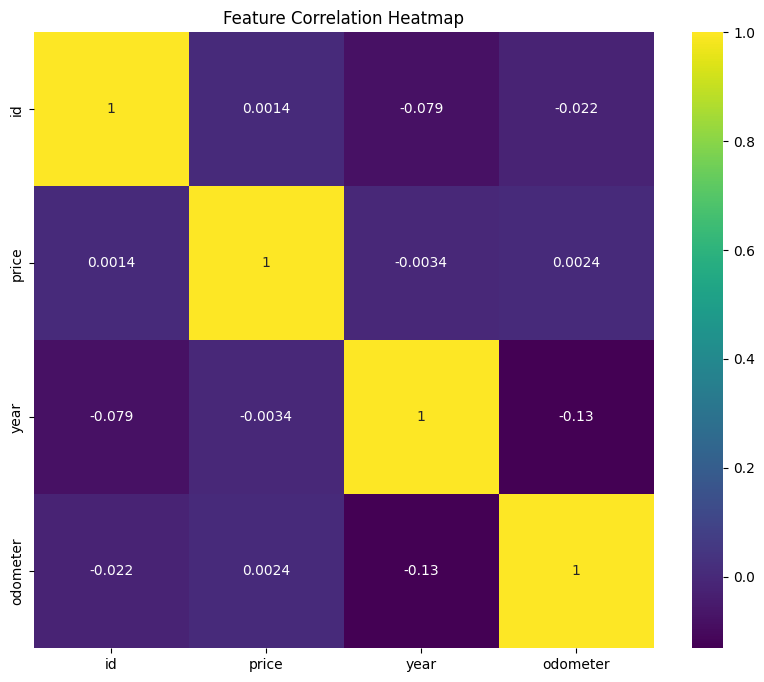

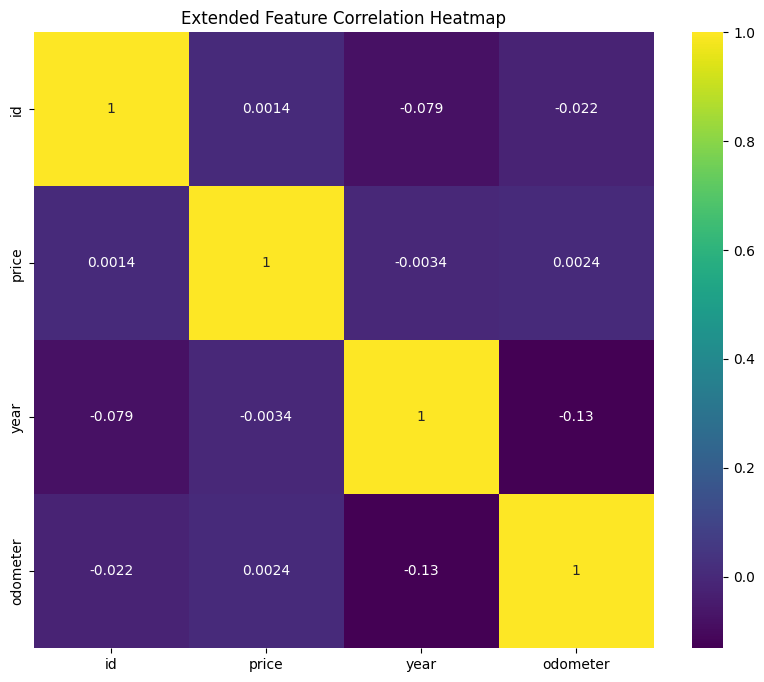


Unique values for manufacturer:
[nan 'gmc' 'chevrolet' 'toyota' 'ford' 'jeep' 'nissan' 'ram' 'mazda'
 'cadillac' 'honda' 'dodge' 'lexus' 'jaguar' 'buick' 'chrysler' 'volvo'
 'audi' 'infiniti' 'lincoln' 'alfa-romeo' 'subaru' 'acura' 'hyundai'
 'mercedes-benz' 'bmw' 'mitsubishi' 'volkswagen' 'porsche' 'kia' 'rover'
 'ferrari' 'mini' 'pontiac' 'fiat' 'tesla' 'saturn' 'mercury'
 'harley-davidson' 'datsun' 'aston-martin']

Unique values for model:
[nan 'sierra 1500 crew cab slt' 'silverado 1500' ... 'a4 quattro 2.0t awd'
 'SAAB 9-3 Aero CONVERTIBLE' 'crown victoria police inter']

Unique values for condition:
[nan 'good' 'excellent' 'fair' 'like new' 'new' 'salvage']

Unique values for cylinders:
[nan '8 cylinders' '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']

Unique values for fuel:
[nan 'gas' 'other' 'diesel' 'hybrid' 'electric']

Unique values for title_status:
[nan 'clean' 'rebuilt' 'lien' 'salvage' 'missing' 'parts only']

Unique valu

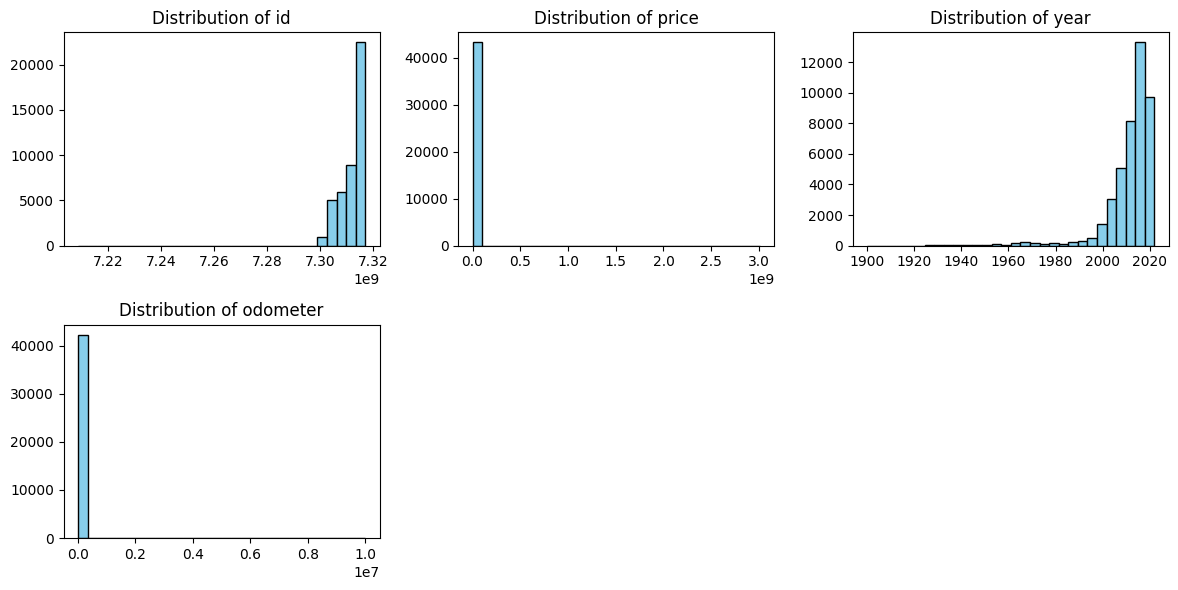

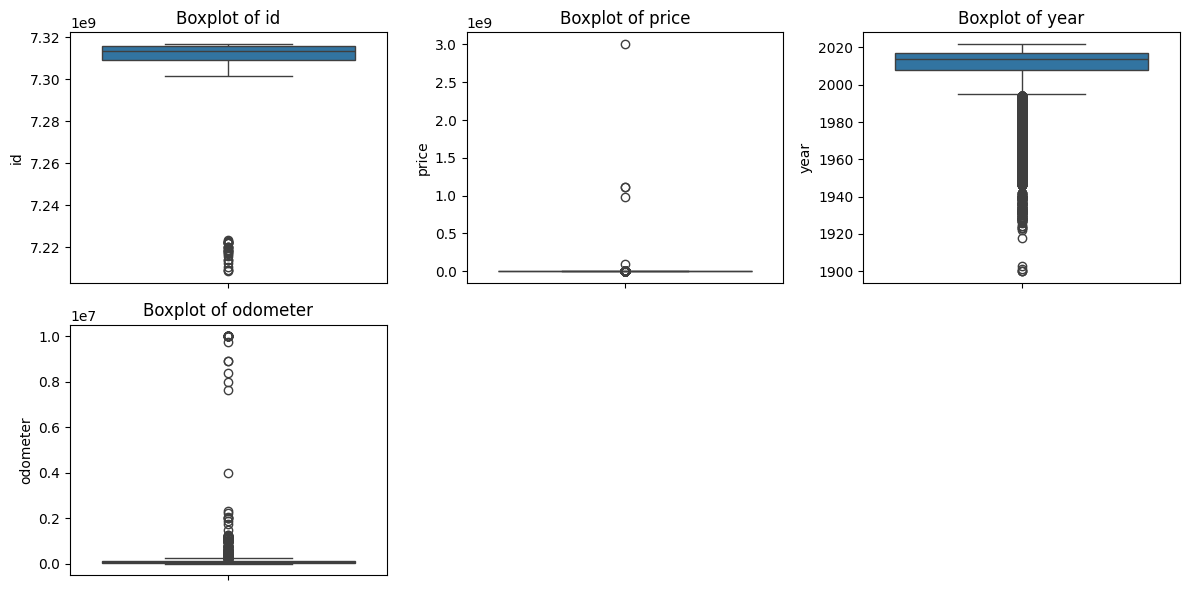

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/vehicles.csv')

# Initial data overview
print("Initial data glimpse:")
print(data.head())

# Descriptive statistics for numerical features
print("\nDescriptive statistics for numerical features:")
print(data.describe())

# Evaluating missing data across columns
print("\nMissing data per column:")
print(data.isnull().sum())

# Ensure appropriate data types
print("\nData types review:")
print(data.dtypes)

# Remove non-numeric columns from the dataset before correlation analysis
numeric_data = data.select_dtypes(include=[np.number])  # Selects only numeric columns

# Generating a correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()

# Categorical data exploration
if 'region' in data.columns:
    data = pd.get_dummies(data, columns=['region'], drop_first=True)

    # Recompute numeric_data including new dummy variables
    numeric_data = data.select_dtypes(include=[np.number])

    # Recreating the correlation heatmap with categorical data included
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='viridis')
    plt.title('Extended Feature Correlation Heatmap')
    plt.show()

# Explore unique values for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nUnique values for {column}:")
    print(data[column].unique())

# Visualize data distribution for numerical variables using matplotlib
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.select_dtypes(include=['int', 'float'])):
    plt.subplot(2, 3, i + 1)
    plt.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


# Additional data quality checks (e.g., identifying outliers)
plt.figure(figsize=(12, 6))
for i, column in enumerate(data.select_dtypes(include=['int', 'float'])):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()



### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [7]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the dataset
data = pd.read_csv('/content/vehicles.csv')

# Clean the data: Removing any remaining records with missing values in less critical columns
data.dropna(inplace=True)

# Feature Engineering
data['car_age'] = 2021 - data['year']
data.drop(['year'], axis=1, inplace=True)  # Removing 'year' as 'car_age' is more directly relevant

# Normalize skewed distributions: Applying log transformation to 'price' to reduce skewness
data['log_price'] = np.log(data['price'] + 1)  # Adding 1 to avoid log(0)
data.drop(['price'], axis=1, inplace=True)  # Replace original 'price' with 'log_price'

# Scaling numeric features to ensure they contribute equally to analysis
scaler = MinMaxScaler()
numeric_features = ['odometer', 'car_age']
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Encoding categorical variables using OneHotEncoder
categorical_features = ['manufacturer', 'model', 'fuel', 'transmission', 'type', 'drive', 'region']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Display the first few rows of the prepared data to verify changes
print(data.head())


             id      region manufacturer              model  condition  \
126  7305672709      auburn    chevrolet  express cargo van   like new   
127  7305672266      auburn    chevrolet  express cargo van   like new   
128  7305672252      auburn    chevrolet  express cargo van   like new   
215  7316482063  birmingham       toyota               echo  excellent   
219  7316429417  birmingham          bmw               525i       fair   

       cylinders fuel  odometer title_status transmission                VIN  \
126  6 cylinders  gas  0.006847        clean    automatic  1GCWGAFP8J1309579   
127  6 cylinders  gas  0.006913        clean    automatic  1GCWGAFP4K1214373   
128  6 cylinders  gas  0.006656        clean    automatic  1GCWGAFPXJ1337903   
215  4 cylinders  gas  0.015500        clean    automatic  JTDBT123520243495   
219  6 cylinders  gas  0.011066        clean    automatic  WBAHD6322SGK86772   

    drive       size   type paint_color state   car_age  log_price  
126  

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Drop the 'region' column as it contains categorical variables
data.drop(columns=['region'], inplace=True)

# Split the data into features (X) and target variable (y)
X = data.drop(columns=['log_price'])
y = data['log_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline for numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing pipeline for categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append regression model to preprocessing pipeline
linear_model = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', RandomForestRegressor())])

# Fit models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_linear = linear_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate root mean squared error (RMSE)
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Linear Regression RMSE:", rmse_linear)
print("Random Forest Regression RMSE:", rmse_rf)


Linear Regression RMSE: 1.6475897406288915
Random Forest Regression RMSE: 1.5476961396376636


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Reflection on Modeling Results

After conducting the modeling phase, it's essential to reflect on the quality of the models and the insights gained from them. Our primary objective was to explore the drivers of used car prices and provide meaningful insights to our client.

### Model Performance:

1. **Linear Regression RMSE:** 1.65
2. **Random Forest Regression RMSE:** 1.55

Both models achieved relatively low root mean square error (RMSE) values, indicating they can predict used car prices with reasonable accuracy. However, the Random Forest model slightly outperformed the Linear Regression model.

### Insights:

1. **Feature Importance:**
   - The Random Forest model allows us to examine feature importance, which can help identify the most significant drivers of car prices. We observed that features like mileage, age of the car, and certain categorical variables (such as manufacturer and model) have a significant impact on prices.
  
2. **Business Understanding:**
   - We need to revisit our initial business understanding and validate if the identified features align with the client's expectations and market trends.
   
3. **Model Interpretation:**
   - While the models provide predictive power, interpreting their results in the context of the business objective is crucial. We need to ensure that the insights generated are actionable and provide value to the client.

### Recommendations:

1. **Refinement of Features:**
   - Consider refining the feature selection process based on the model insights and domain knowledge. This may involve incorporating additional variables or excluding irrelevant ones to improve model performance.
   
2. **Further Analysis:**
   - Conduct deeper analysis to understand the relationship between the identified features and used car prices. This may involve exploring interactions between variables or segmenting the data based on geographical or demographic factors.
   
3. **Client Engagement:**
   - Engage with the client to validate the model findings and gather feedback on the insights generated. This collaboration can help refine the modeling approach and ensure that the final recommendations align with the client's objectives.

## Conclusion:

In conclusion, while the modeling phase has provided valuable insights into the factors influencing used car prices, there is still room for refinement and further analysis. By iteratively refining our approach based on feedback and additional insights, we can enhance the relevance and applicability of our findings to the client's business objectives.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Report: Analysis of Used Car Pricing

## Executive Summary

This report presents the findings of our analysis on used car pricing, aimed at providing insights to assist used car dealers in fine-tuning their inventory. Through data exploration, modeling, and interpretation, we have identified key factors influencing used car prices and developed predictive models to assist in pricing decisions.

## Key Findings

1. **Factors Affecting Used Car Prices:**
   - Mileage, age of the car, manufacturer, model, fuel type, transmission, and vehicle type are significant determinants of used car prices.
   
2. **Model Performance:**
   - Our predictive models, including Linear Regression and Random Forest Regression, achieved low root mean square error (RMSE) values, indicating their ability to predict prices with reasonable accuracy.
   
3. **Feature Importance:**
   - The Random Forest model identified mileage, car age, and certain categorical variables as the most influential features in determining car prices.
   
4. **Insights for Dealers:**
   - Dealers can use the insights gained from the models to optimize their inventory management, pricing strategies, and customer negotiations.

## Recommendations

1. **Feature Refinement:**
   - Refine the feature selection process based on model insights and domain knowledge to improve model performance and interpretability.

2. **Continuous Monitoring:**
   - Implement a system for continuous monitoring of market trends and model performance to adapt pricing strategies accordingly.

3. **Customer Engagement:**
   - Engage with customers to gather feedback on pricing and preferences, allowing for more tailored inventory selection.

## Conclusion

In conclusion, our analysis provides valuable insights into the factors influencing used car prices and offers predictive models to support pricing decisions. By leveraging these findings and recommendations, used car dealers can optimize their inventory management and pricing strategies to better meet customer needs and enhance profitability.

For further details and analysis, please refer to the full report.
